In [3]:
%matplotlib ipympl

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os
from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.helpers import data_identifier, console_bold, present_float

In [4]:
plt.close('all')

In [159]:
data, headers = get_experiment_data(2752)
probe_repeats = len(data["transmissions"]) // headers["params"]["repeats"]

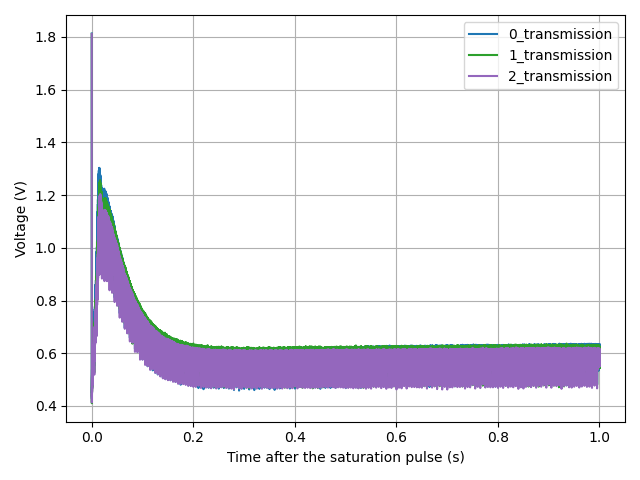

In [160]:
fig, ax = plt.subplots()
for kk in range(headers["params"]["repeats"]):
    if kk != 0:
        pass
    times = np.array([])
    transmissions = np.array([])
    monitors = np.array([])
    for ll in range(probe_repeats):
        index = kk * probe_repeats + ll
        times = np.append(times, data["times"] + ll * (0.000005 + 5e-3))
        transmissions = np.append(transmissions, data["transmissions"][index])
        monitors = np.append(monitors, data["monitors"][index])
    plot_kwargs_trans = {"label": f"{kk}_transmission"}
    plot_kwargs_monitors = {"label": f"{kk}_monitor"}
    ax.plot(times, transmissions, color=f"C{kk*2}", **plot_kwargs_trans)
    #ax.plot(times, monitors, color=f"C{kk*2+1}", **plot_kwargs_monitors)
ax.grid()
ax.set_ylabel("Voltage (V)")
ax.set_xlabel("Time after the saturation pulse (s)")
#ax.set_yscale("log")
ax.legend()
plt.tight_layout()
plt.show()

In [161]:
all_ratios = data["transmissions"] / data["monitors"]

In [162]:
all_ratios = []
for ll in range(len(data["transmissions"])):
    ratios = []
    transmissions = []
    monitors = []
    
    for kk in range(int(len(data["transmissions"][ll]) / 10)):
        transmissions.append(np.average(data["transmissions"][ll][kk * 10 + 1: kk * 10 + 5]))
        monitors.append(np.average(data["transmissions"][ll][kk * 10 + 6: kk * 10 + 10]))
        ratios.append(transmissions[-1] / monitors[-1])
    if ll == 1:
        print(monitors[:10])
        print(transmissions[:10])
        print(ratios[:10])
    all_ratios.append(ratios)
all_ratios = np.array(all_ratios)
times = np.average(data["times"].reshape(-1, 10), axis=1)

[0.6348858642578125, 0.631689453125, 0.6332476806640626, 0.6333349609375, 0.6293811035156249, 0.6301904296874999, 0.63109130859375, 0.631368408203125, 0.6298400878906251, 0.630362548828125]
[0.6806414794921876, 0.718602294921875, 0.7175201416015625, 0.7222509765624999, 0.7169567871093749, 0.7215539550781249, 0.7170220947265625, 0.7237152099609376, 0.7215948486328125, 0.7235797119140625]
[1.0720690407682392, 1.1375879261034243, 1.1330797782774769, 1.140393348084529, 1.1391457149008222, 1.1449776465757033, 1.1361622081665024, 1.146264527268052, 1.1456794550017928, 1.1478786505626528]


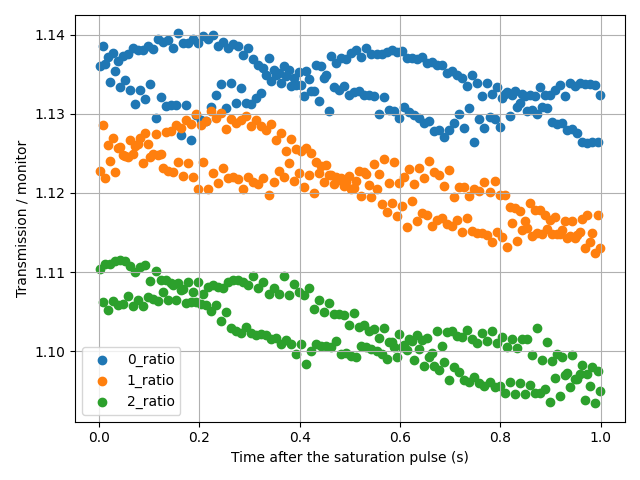

In [163]:
fig, ax = plt.subplots()
for kk in range(headers["params"]["repeats"]):
    if kk != 0:
        pass
    for ll in range(probe_repeats):
        index = kk * probe_repeats + ll
        if ll == 0:
            ax.scatter(np.average(times + ll * 0.005005), np.average(all_ratios[index]), color=f"C{kk}", label=f"{kk}_ratio")
        else:
            ax.scatter(np.average(times + ll * 0.005005), np.average(all_ratios[index]), color=f"C{kk}")
ax.grid()
ax.set_ylabel("Transmission / monitor")
ax.set_xlabel("Time after the saturation pulse (s)")
#ax.set_yscale("log")
ax.legend()
plt.tight_layout()
plt.show()